In [1]:
import numpy as np
import sys
import itertools as itertools
sys.path.append("..")

import matplotlib.pyplot as plt
from python.Hamiltonian_to_MPO import Spinless_fermions, get_exact_gs_energy_spinless_fermions
from python.DMRG import DMRG
from python.Zippers import MPO_to_Hamiltonian

In [12]:
n_sites = 10

hopping_amps_uniform = np.array([1.0 for _ in range(n_sites)])

Hamiltonian_uniform = Spinless_fermions(hopping_amps_uniform)
exact_gs_uniform = get_exact_gs_energy_spinless_fermions(hopping_amps_uniform)

In [13]:
exact_gs_uniform

-6.026674183332269

In [14]:
MPO_transposed = [ham.transpose(2, 3, 0, 1) for ham in Hamiltonian_uniform]
matrix = MPO_to_Hamiltonian(MPO_transposed)
eigvals, _ = np.linalg.eigh(matrix)
eigvals

array([-6.02667418, -5.74204451, -5.74204451, ...,  5.74204451,
        5.74204451,  6.02667418])

In [15]:
NKeep = 10
NSweep = 10
Krylov_bases = 5 #* 5 is usually enough
Lanczos_cutoff = 1e-4 #* Lanczos cutoff
# iterative_diag = True
# two_site = True
verbose = True

L=10 | NKeep=10 | NSweep=10 | iterative=False | two_site=False | Krylov_bases=5 | Lanczos_cutoff=0.0001
iter=0 | energy=0.1872641 | time=0.0s
iter=1 | energy=-6.0263189 | time=0.0577s
iter=2 | energy=-6.0266543 | time=0.102s
iter=3 | energy=-6.0266555 | time=0.131s
iter=4 | energy=-6.0266555 | time=0.159s
iter=5 | energy=-6.0266555 | time=0.18s
iter=6 | energy=-6.0266555 | time=0.197s
iter=7 | energy=-6.0266555 | time=0.216s
iter=8 | energy=-6.0266555 | time=0.235s
iter=9 | energy=-6.0266555 | time=0.252s
iter=10 | energy=-6.0266555 | time=0.269s
L=10 | NKeep=10 | NSweep=10 | iterative=False | two_site=True | Krylov_bases=5 | Lanczos_cutoff=0.0001
iter=0 | energy=-0.35696482 | time=0.0s
iter=1 | energy=-6.0266164 | time=0.0787s
iter=2 | energy=-6.0266554 | time=0.14s
iter=3 | energy=-6.0266554 | time=0.189s
iter=4 | energy=-6.0266553 | time=0.238s
iter=5 | energy=-6.0266553 | time=0.287s
iter=6 | energy=-6.0266553 | time=0.337s
iter=7 | energy=-6.0266553 | time=0.385s
iter=8 | energy=-

Text(0, 0.5, 'Absolute error')

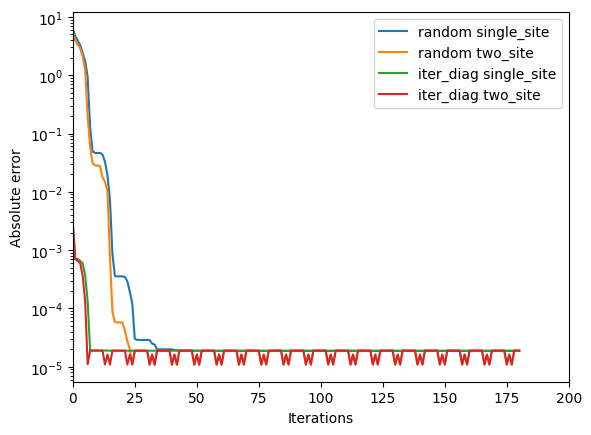

In [16]:
fig, ax = plt.subplots(1, 1)

label1s = ["random", "iter_diag"]
label2s = ["single_site", "two_site"]

iterative_diags = [False, True]
two_sites = [False, True]

for it1, iterative_diag in enumerate(iterative_diags):
    for it2, two_site in enumerate(two_sites):
        energies_uniform, times_uniform, MPS_uniform = DMRG(
            Hamiltonian = Hamiltonian_uniform,
            NKeep = NKeep,
            NSweep = NSweep,
            Krylov_bases = Krylov_bases,
            Lanczos_cutoff = Lanczos_cutoff,
            iterative_diag = iterative_diag,
            two_site = two_site,
            verbose = verbose,
        )
        
        ax.plot(energies_uniform - exact_gs_uniform, label = f"{label1s[it1]} {label2s[it2]}")

ax.set_xlim(0, n_sites*2*NSweep)
ax.set_yscale("log")
ax.legend()

ax.set_xlabel(r"Iterations")
ax.set_ylabel(r"Absolute error")

In [19]:
energies_uniform_excited, times_uniform_excited, MPS_uniform_excited = DMRG(
    Hamiltonian = Hamiltonian_uniform,
    NKeep = NKeep,
    NSweep = NSweep,
    Krylov_bases = Krylov_bases,
    Lanczos_cutoff = Lanczos_cutoff,
    iterative_diag = True,
    two_site = two_site,
    orthogonal_to_list_of_MPS = [MPS_uniform],
    verbose = verbose,
)

L=10 | NKeep=10 | NSweep=10 | iterative=True | two_site=True | Krylov_bases=5 | Lanczos_cutoff=0.0001
iter=0 | energy=-6.0238599 | time=0.0s
iter=1 | energy=-5.7253458 | time=0.182s
iter=2 | energy=-5.7420376 | time=0.34s
iter=3 | energy=-5.7420377 | time=0.46s
iter=4 | energy=-5.7420377 | time=0.642s
iter=5 | energy=-5.7420377 | time=0.761s
iter=6 | energy=-5.7420377 | time=0.868s
iter=7 | energy=-5.7420377 | time=1.0s
iter=8 | energy=-5.7420377 | time=1.11s
iter=9 | energy=-5.7420377 | time=1.21s
iter=10 | energy=-5.7420377 | time=1.31s


In [20]:
from python.Zippers import MPS_MPS_overlap, MPS_MPO_MPS_overlap, contract_MPS

MPS_MPS_overlap(MPS_uniform, MPS_uniform_excited)

array(-1.33350009e-17)

In [21]:
gs_uniform = contract_MPS(MPS_uniform).reshape(-1)
ex_uniform = contract_MPS(MPS_uniform_excited).reshape(-1)

In [25]:
(gs_uniform @ matrix @ gs_uniform)

-6.026655286255079

In [26]:
np.linalg.norm(matrix @ gs_uniform - (gs_uniform @ matrix @ gs_uniform) * gs_uniform)

0.010085066698095816

In [27]:
(ex_uniform @ matrix @ ex_uniform)

-5.742037651955714

In [28]:
np.linalg.norm(matrix @ ex_uniform - (ex_uniform @ matrix @ ex_uniform) * ex_uniform)

0.005594935705736846

In [29]:
Hamiltonian_uniform_transposed = [ham.transpose(2, 3, 0, 1) for ham in Hamiltonian_uniform]

MPS_MPO_MPS_overlap(MPS_uniform_excited, Hamiltonian_uniform_transposed, MPS_uniform_excited)

array(-5.74203765)